#### Historical weather data from São Carlos, São Paulo, Brazil.
##### Years: 2010 to 2019.
##### Data source: National Weather Institute (http://www.inmet.gov.br)
##### I used this database in my master's degree in Transportation Systems Planning, at the University of São Paulo (USP).
##### Master's Dissertation available from: https://teses.usp.br/teses/disponiveis/18/18144/tde-07072016-200409/en.php

In [1]:
# Importing the data.

import pandas as pd
import numpy as np

pd.options.display.float_format = "{:,.1f}".format

NewData = pd.read_csv('_New2010-2019_withNaN_MinTemp.csv')

NewData['Month'] = pd.to_datetime(NewData['Date']).dt.strftime('%m')
NewData['Month'] += pd.to_datetime(NewData['Date']).dt.strftime('%b')

NewData = NewData[['Date','Month','Year','Season','Rain (mm)','Max Temp (°C)','Min Temp (°C)']]

NewData

,Date,Month,Year,Season,Rain (mm),Max Temp (°C),Min Temp (°C)
0,2010-01-01,01Jan,2010,Summer,0.4,29.5,19.6
1,2010-01-02,01Jan,2010,Summer,11.6,29.0,19.8
2,2010-01-03,01Jan,2010,Summer,0.2,31.3,19.5
3,2010-01-04,01Jan,2010,Summer,0.0,31.2,20.0
4,2010-01-05,01Jan,2010,Summer,0.0,31.1,21.1
...,...,...,...,...,...,...,...
3647,2019-12-27,12Dec,2019,Summer,0.0,32.2,19.7
3648,2019-12-28,12Dec,2019,Summer,9.0,32.1,20.6
3649,2019-12-29,12Dec,2019,Summer,0.0,31.3,19.8
3650,2019-12-30,12Dec,2019,Summer,0.0,30.3,20.2


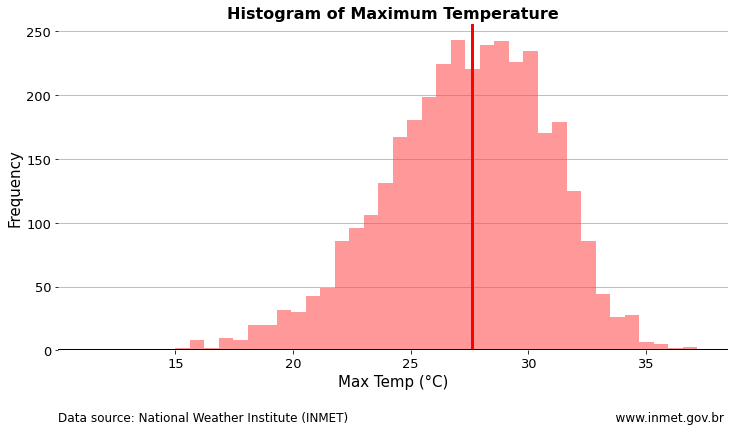

In [2]:
# Plotting a histogram of the maximum temperature.

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

ax = sns.distplot(NewData['Max Temp (°C)'], color='red', kde=False)

ax.set_title('Histogram of Maximum Temperature', fontsize=16, weight='bold')
ax.set_xlabel('Max Temp (°C)', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.tick_params(labelsize=13)

median = NewData['Max Temp (°C)'].median()
plt.axvline(median, color='red', linewidth=3)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)
plt.axhline(0, color='black', linewidth=2)

ax.text(x=10, y=-55, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=True, right=True)

plt.show()

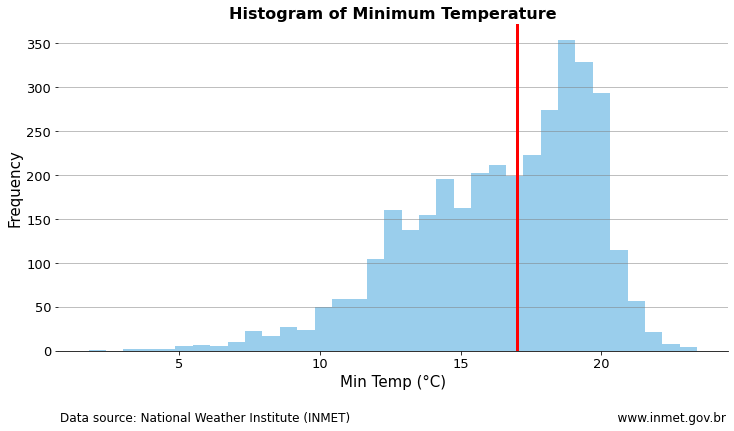

In [3]:
# Plotting a histogram of the minimum temperature.

plt.figure(figsize=(12,6))

ax = sns.distplot(NewData['Min Temp (°C)'], color='#0485d1', kde=False)

ax.set_title('Histogram of Minimum Temperature', fontsize=16, weight='bold')
ax.set_xlabel('Min Temp (°C)', fontsize=15)
ax.set_ylabel('Frequency', fontsize=15)
ax.tick_params(labelsize=13)

median = NewData['Min Temp (°C)'].median()
plt.axvline(median, color='red', linewidth=3)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=0.8, y=-80, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

plt.show()

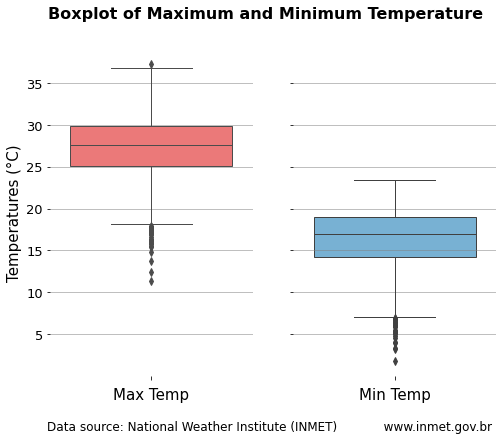

In [4]:
# Plotting a boxplot of maximum and minimum temperature.

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(8,6))

sns.boxplot(y='Max Temp (°C)', data=NewData, color='red', linewidth=1, ax=ax1)
sns.boxplot(y='Min Temp (°C)', data=NewData, color='#0485d1', linewidth=1, ax=ax2)

fig.suptitle('Boxplot of Maximum and Minimum Temperature', fontsize=16, weight='bold')
ax1.set_xlabel('Max Temp', fontsize=15)
ax1.set_ylabel('Temperatures (°C)', fontsize=15)
ax1.tick_params(labelsize=13)
ax2.set_xlabel('Min Temp', fontsize=15)
ax2.set_ylabel('')
ax2.tick_params(labelsize=13)

ax1.yaxis.grid(which="major", color='grey', linewidth=0.5)
ax2.yaxis.grid(which="major", color='grey', linewidth=0.5)

for patch in ax1.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))
for patch in ax2.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

fig.text(x=0.12, y=0, s='Data source: National Weather Institute (INMET)'+' '*12+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=True, right=True)

plt.show()

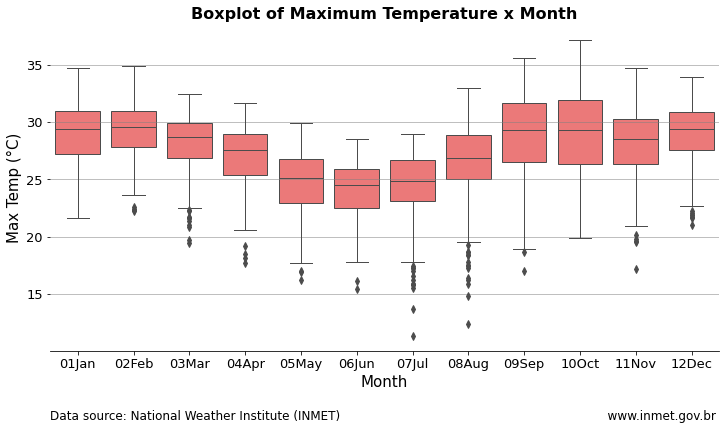

In [5]:
# Plotting a boxplot of the maximum temperature x month.

plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Month', y='Max Temp (°C)', data=NewData, color='red', linewidth=1)

ax.axes.set_title('Boxplot of Maximum Temperature x Month', fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Max Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

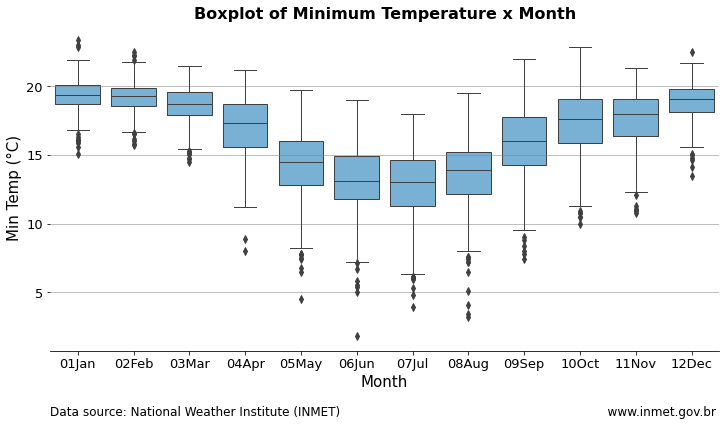

In [6]:
# Plotting a boxplot of the minimum temperature x month.

plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Month', y='Min Temp (°C)', data=NewData, color='#0485d1', linewidth=1)

ax.axes.set_title('Boxplot of Minimum Temperature x Month', fontsize=16, weight='bold')
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Min Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

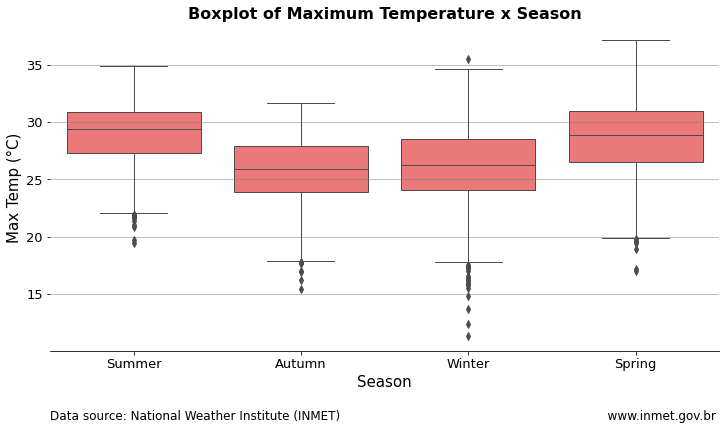

In [7]:
# Plotting a boxplot of the maximum temperature x season.

plt.figure(figsize=(12,6))

seasons = ['Summer','Autumn','Winter','Spring']

ax = sns.boxplot(x='Season', y='Max Temp (°C)', data=NewData, color='red', linewidth=1, 
                 order=seasons)

ax.axes.set_title('Boxplot of Maximum Temperature x Season', fontsize=16, weight='bold')
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel('Max Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

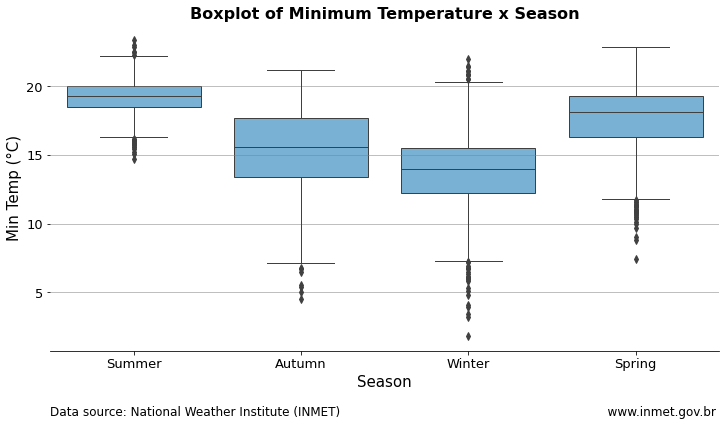

In [8]:
# Plotting a boxplot of the minimum temperature x season.

plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Season', y='Min Temp (°C)', data=NewData, color='#0485d1', linewidth=1, 
                 order=seasons)

ax.axes.set_title('Boxplot of Minimum Temperature x Season', fontsize=16, weight='bold')
ax.set_xlabel('Season', fontsize=15)
ax.set_ylabel('Min Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

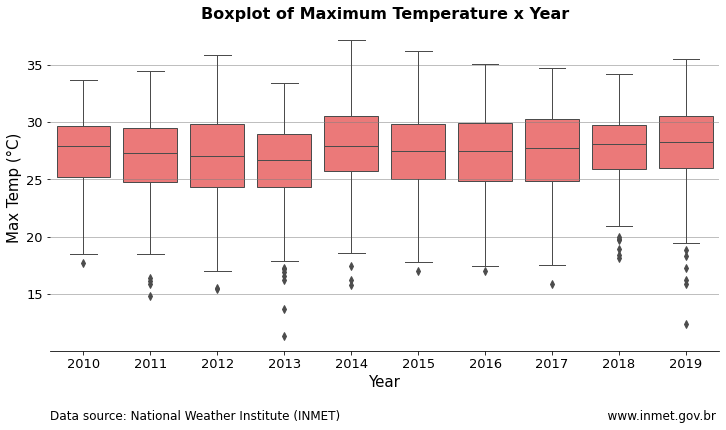

In [9]:
# Plotting a boxplot of the maximum temperature x year.

plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Year', y='Max Temp (°C)', data=NewData, color='red', linewidth=1)

ax.axes.set_title('Boxplot of Maximum Temperature x Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Max Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

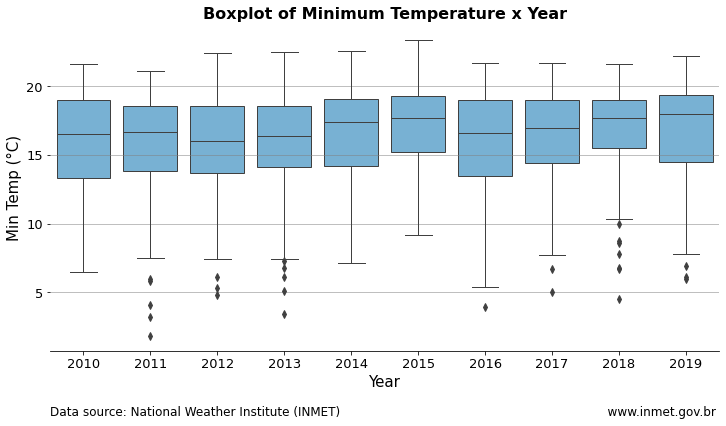

In [10]:
# Plotting a boxplot of the minimum temperature x year.

plt.figure(figsize=(12,6))

ax = sns.boxplot(x='Year', y='Min Temp (°C)', data=NewData, color='#0485d1', linewidth=1)

ax.axes.set_title('Boxplot of Minimum Temperature x Year', fontsize=16, weight='bold')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Min Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.yaxis.grid(which="major", color='grey', linewidth=0.5)

ax.text(x=-0.5, y=-4, s='Data source: National Weather Institute (INMET)'+' '*69+'www.inmet.gov.br', 
        fontsize=12)

sns.despine(left=True, bottom=False, right=True)

for patch in ax.artists:
  r, g, b, a = patch.get_facecolor()
  patch.set_facecolor((r, g, b, .6))

plt.show()

In [11]:
# Estimating the correlation between the temperatures.

corr = NewData['Max Temp (°C)'].corr(NewData['Min Temp (°C)'])
print('Correlation between Maximum and Minimum Temperature:', corr)

Correlation between Maximum and Minimum Temperature: 0.5980948649073179


In [12]:
# Estimating the linear regression model with the maximum and minimum temperature
# (dependent and independent variable, respectively).

import statsmodels.api as sm

x = NewData['Min Temp (°C)'].dropna()
y = NewData['Max Temp (°C)'].dropna()
x, y = np.array(x), np.array(y)

x = sm.add_constant(x)
model = sm.OLS(y, x)
results = model.fit()

print('Coefficient of determination (R²):', results.rsquared)
print('Parameters:', results.params)

Coefficient of determination (R²): 0.35771746742850286
Parameters: [16.68043144  0.64831546]


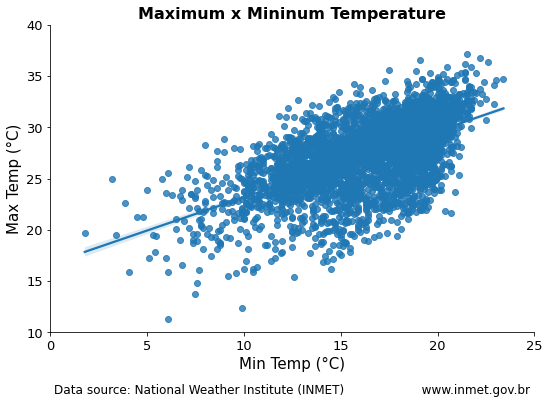

In [13]:
# Plotting the linear regression model with the maximum and minimum temperature
# (dependent and independent variable, respectively).

sns.lmplot(x='Min Temp (°C)', y='Max Temp (°C)', data=NewData, height=5, aspect=1.5)
ax = plt.gca()

ax.set_title('Maximum x Mininum Temperature', fontsize=16, weight='bold')
ax.set_xlabel('Min Temp (°C)', fontsize=15)
ax.set_ylabel('Max Temp (°C)', fontsize=15)
ax.tick_params(labelsize=13)

ax.text(x=0.2, y=4, s='Data source: National Weather Institute (INMET)'+' '*20+'www.inmet.gov.br', 
        fontsize=12)

plt.ylim(10, 40)
plt.xlim(0, 25)

plt.show()

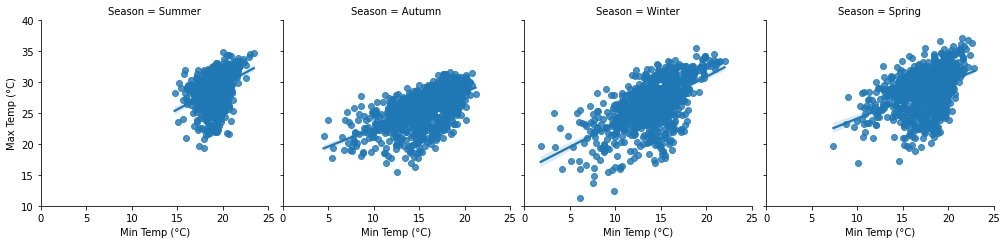

In [14]:
# Plotting the linear regression models filtered by seasons.

sns.lmplot(x='Min Temp (°C)', y='Max Temp (°C)', col='Season', data=NewData, height=3.5, aspect=1)

plt.ylim(10, 40)
plt.xlim(0, 25)

plt.show()

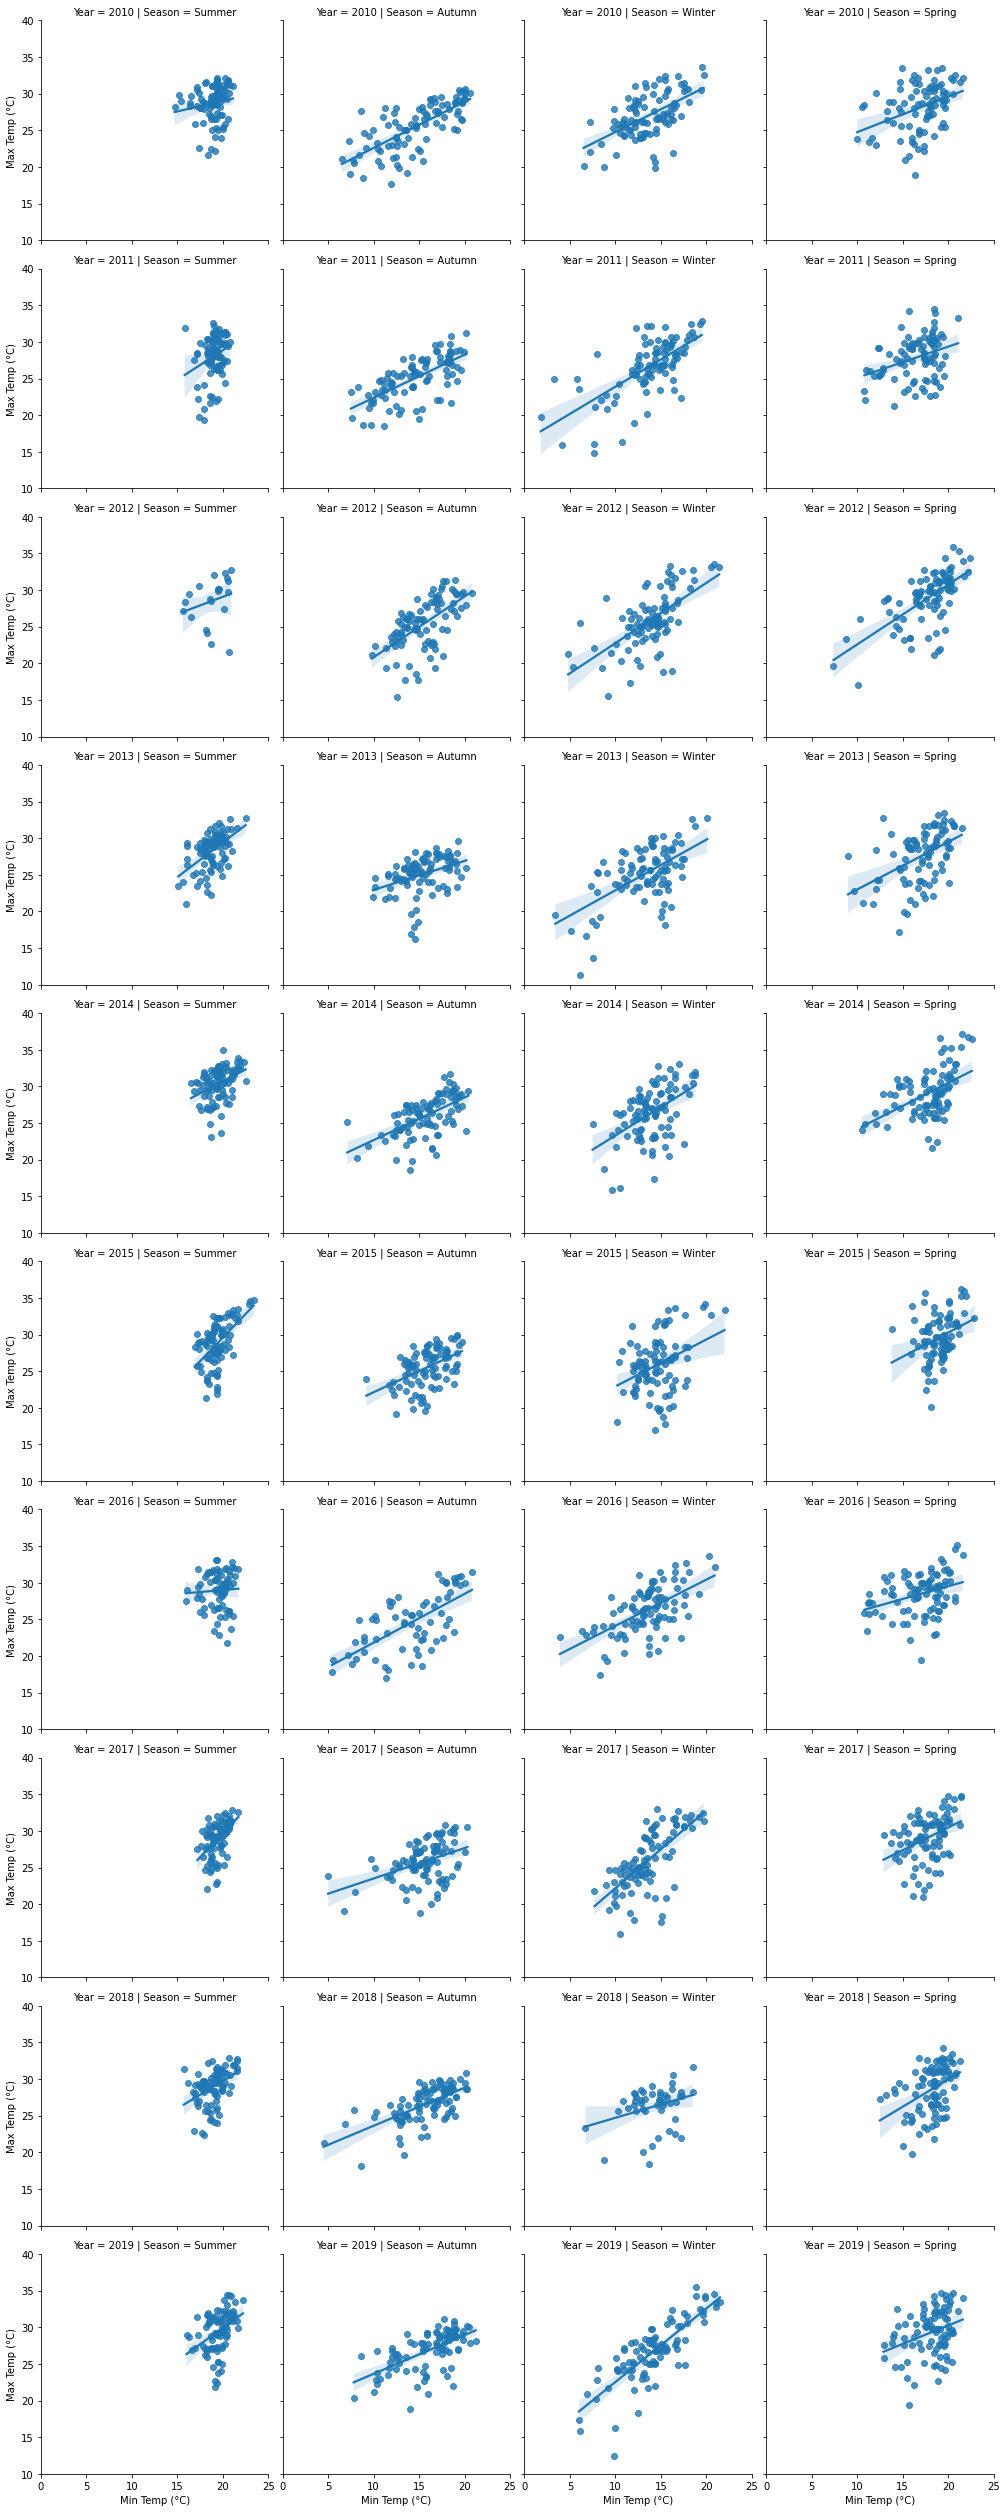

In [15]:
# Plotting the linear regression models filtered by seasons and years.

sns.lmplot(x='Min Temp (°C)', y='Max Temp (°C)', col='Season', row='Year', data=NewData, height=3.5, aspect=1)

plt.ylim(10, 40)
plt.xlim(0, 25)

plt.show()